**Stephen Curry vs Damian Lillard**

In [1]:
!pip install nba_api pandas matplotlib seaborn

In [2]:
# Search for Curry's, Lillard's ID in nba_api

from nba_api.stats.static import players

curry_info = players.find_players_by_full_name("Stephen Curry")
lillard_info = players.find_players_by_full_name("Damian Lillard")

curry_id = curry_info[0]['id']
lillard_id = lillard_info[0]['id']

print("Stephen Curry's ID:", curry_id)
print("Damian Lillard's ID:", lillard_id)


Stephen Curry's ID: 201939
Damian Lillard's ID: 203081


In [3]:
from nba_api.stats.endpoints import shotchartdetail

# Function to fetch shot data for a given player and season
def fetch_shot_data(player_id, season):
    shot_chart = shotchartdetail.ShotChartDetail(
        team_id=0,
        player_id=player_id,
        season_nullable=season,
        season_type_all_star='Regular Season',
        context_measure_simple='FGA'  # Includes all field goal attempts
    )

    # Convert to DataFrame
    shot_data = shot_chart.get_data_frames()[0]
    return shot_data


In [4]:
season = '2023-24'

curry_shot_data = fetch_shot_data(curry_id, season)
lillard_shot_data = fetch_shot_data(lillard_id, season)

In [24]:

print("Unique values in SHOT_MADE_FLAG for Curry:", curry_shot_data['SHOT_MADE_FLAG'].unique())
print("Unique values in SHOT_MADE_FLAG for Lillard:", lillard_shot_data['SHOT_MADE_FLAG'].unique())


Unique values in SHOT_MADE_FLAG for Curry: [0 1]
Unique values in SHOT_MADE_FLAG for Lillard: [0 1]


In [6]:
curry_shot_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300005,40,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,17,...,Left Side Center(LC),24+ ft.,24,-188,153,1,0,20231103,OKC,GSW
1,Shot Chart Detail,0022300005,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,0,...,Right Side Center(RC),24+ ft.,28,145,243,1,1,20231103,OKC,GSW
2,Shot Chart Detail,0022300005,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,15,...,Center(C),24+ ft.,27,50,272,1,1,20231103,OKC,GSW
3,Shot Chart Detail,0022300005,281,201939,Stephen Curry,1610612744,Golden State Warriors,2,3,23,...,Center(C),Less Than 8 ft.,4,-45,0,1,0,20231103,OKC,GSW
4,Shot Chart Detail,0022300005,292,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,29,...,Right Side(R),24+ ft.,24,230,83,1,1,20231103,OKC,GSW


In [7]:
lillard_shot_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300002,14,203081,Damian Lillard,1610612749,Milwaukee Bucks,1,10,50,...,Left Side Center(LC),16-24 ft.,18,-121,135,1,0,20231103,MIL,NYK
1,Shot Chart Detail,0022300002,37,203081,Damian Lillard,1610612749,Milwaukee Bucks,1,8,8,...,Center(C),8-16 ft.,11,45,110,1,1,20231103,MIL,NYK
2,Shot Chart Detail,0022300002,40,203081,Damian Lillard,1610612749,Milwaukee Bucks,1,7,44,...,Left Side Center(LC),24+ ft.,26,-208,161,1,0,20231103,MIL,NYK
3,Shot Chart Detail,0022300002,238,203081,Damian Lillard,1610612749,Milwaukee Bucks,2,5,49,...,Left Side Center(LC),24+ ft.,29,-130,266,1,1,20231103,MIL,NYK
4,Shot Chart Detail,0022300002,262,203081,Damian Lillard,1610612749,Milwaukee Bucks,2,4,46,...,Center(C),Less Than 8 ft.,4,11,43,1,0,20231103,MIL,NYK


In [8]:
# Save data to CSV files

curry_shot_data.to_csv('curry_shot_data_2324.csv', index = False)
lillard_shot_data.to_csv('lillard_shot_data_2324.csv', index = False)

In [9]:
print("Stephen Curry Shot Data:")
print(curry_shot_data.head())

Stephen Curry Shot Data:
           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0  Shot Chart Detail  0022300005             40     201939  Stephen Curry   
1  Shot Chart Detail  0022300005             53     201939  Stephen Curry   
2  Shot Chart Detail  0022300005            249     201939  Stephen Curry   
3  Shot Chart Detail  0022300005            281     201939  Stephen Curry   
4  Shot Chart Detail  0022300005            292     201939  Stephen Curry   

      TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612744  Golden State Warriors       1                  8   
1  1610612744  Golden State Warriors       1                  7   
2  1610612744  Golden State Warriors       2                  6   
3  1610612744  Golden State Warriors       2                  3   
4  1610612744  Golden State Warriors       2                  2   

   SECONDS_REMAINING  ...         SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                 17  ...   Left Side Ce

In [10]:
print("Damian Lillard Shot Data:")
print(lillard_shot_data.head())

Damian Lillard Shot Data:
           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID     PLAYER_NAME  \
0  Shot Chart Detail  0022300002             14     203081  Damian Lillard   
1  Shot Chart Detail  0022300002             37     203081  Damian Lillard   
2  Shot Chart Detail  0022300002             40     203081  Damian Lillard   
3  Shot Chart Detail  0022300002            238     203081  Damian Lillard   
4  Shot Chart Detail  0022300002            262     203081  Damian Lillard   

      TEAM_ID        TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  1610612749  Milwaukee Bucks       1                 10                 50   
1  1610612749  Milwaukee Bucks       1                  8                  8   
2  1610612749  Milwaukee Bucks       1                  7                 44   
3  1610612749  Milwaukee Bucks       2                  5                 49   
4  1610612749  Milwaukee Bucks       2                  4                 46   

   ...        SHOT_ZONE_

In [11]:
curry_shot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            1445 non-null   object
 1   GAME_ID              1445 non-null   object
 2   GAME_EVENT_ID        1445 non-null   int64 
 3   PLAYER_ID            1445 non-null   int64 
 4   PLAYER_NAME          1445 non-null   object
 5   TEAM_ID              1445 non-null   int64 
 6   TEAM_NAME            1445 non-null   object
 7   PERIOD               1445 non-null   int64 
 8   MINUTES_REMAINING    1445 non-null   int64 
 9   SECONDS_REMAINING    1445 non-null   int64 
 10  EVENT_TYPE           1445 non-null   object
 11  ACTION_TYPE          1445 non-null   object
 12  SHOT_TYPE            1445 non-null   object
 13  SHOT_ZONE_BASIC      1445 non-null   object
 14  SHOT_ZONE_AREA       1445 non-null   object
 15  SHOT_ZONE_RANGE      1445 non-null   object
 16  SHOT_D

In [12]:
lillard_shot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            1277 non-null   object
 1   GAME_ID              1277 non-null   object
 2   GAME_EVENT_ID        1277 non-null   int64 
 3   PLAYER_ID            1277 non-null   int64 
 4   PLAYER_NAME          1277 non-null   object
 5   TEAM_ID              1277 non-null   int64 
 6   TEAM_NAME            1277 non-null   object
 7   PERIOD               1277 non-null   int64 
 8   MINUTES_REMAINING    1277 non-null   int64 
 9   SECONDS_REMAINING    1277 non-null   int64 
 10  EVENT_TYPE           1277 non-null   object
 11  ACTION_TYPE          1277 non-null   object
 12  SHOT_TYPE            1277 non-null   object
 13  SHOT_ZONE_BASIC      1277 non-null   object
 14  SHOT_ZONE_AREA       1277 non-null   object
 15  SHOT_ZONE_RANGE      1277 non-null   object
 16  SHOT_D

In [13]:
columns_to_drop = ['GRID_TYPE', 'PLAYER_NAME', 'TEAM_NAME', 'EVENT_TYPE', 'GAME_DATE', 'HTM', 'VTM']

In [14]:
curry_shot_data = curry_shot_data.drop(columns = columns_to_drop)

In [15]:
lillard_shot_data = lillard_shot_data.drop(columns = columns_to_drop)

In [16]:
curry_shot_data.isnull().sum()
lillard_shot_data.isnull().sum()

GAME_ID                0
GAME_EVENT_ID          0
PLAYER_ID              0
TEAM_ID                0
PERIOD                 0
MINUTES_REMAINING      0
SECONDS_REMAINING      0
ACTION_TYPE            0
SHOT_TYPE              0
SHOT_ZONE_BASIC        0
SHOT_ZONE_AREA         0
SHOT_ZONE_RANGE        0
SHOT_DISTANCE          0
LOC_X                  0
LOC_Y                  0
SHOT_ATTEMPTED_FLAG    0
SHOT_MADE_FLAG         0
dtype: int64

In [17]:
lillard_shot_data.info()
curry_shot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GAME_ID              1277 non-null   object
 1   GAME_EVENT_ID        1277 non-null   int64 
 2   PLAYER_ID            1277 non-null   int64 
 3   TEAM_ID              1277 non-null   int64 
 4   PERIOD               1277 non-null   int64 
 5   MINUTES_REMAINING    1277 non-null   int64 
 6   SECONDS_REMAINING    1277 non-null   int64 
 7   ACTION_TYPE          1277 non-null   object
 8   SHOT_TYPE            1277 non-null   object
 9   SHOT_ZONE_BASIC      1277 non-null   object
 10  SHOT_ZONE_AREA       1277 non-null   object
 11  SHOT_ZONE_RANGE      1277 non-null   object
 12  SHOT_DISTANCE        1277 non-null   int64 
 13  LOC_X                1277 non-null   int64 
 14  LOC_Y                1277 non-null   int64 
 15  SHOT_ATTEMPTED_FLAG  1277 non-null   int64 
 16  SHOT_M

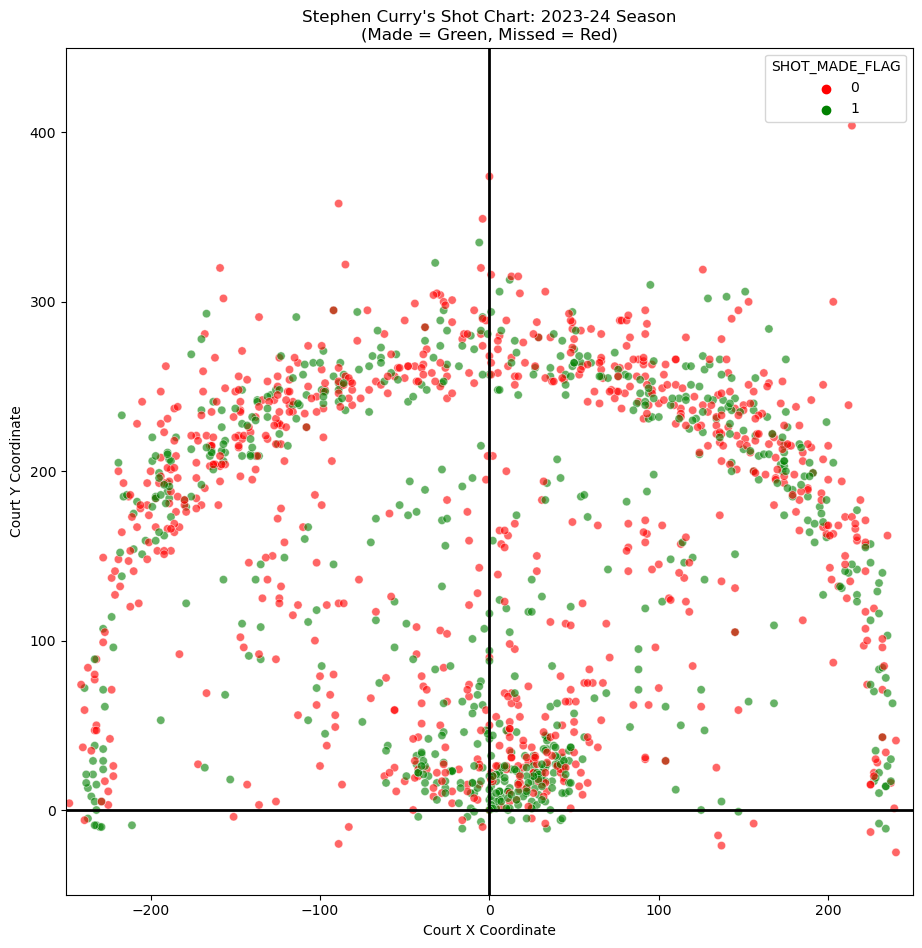

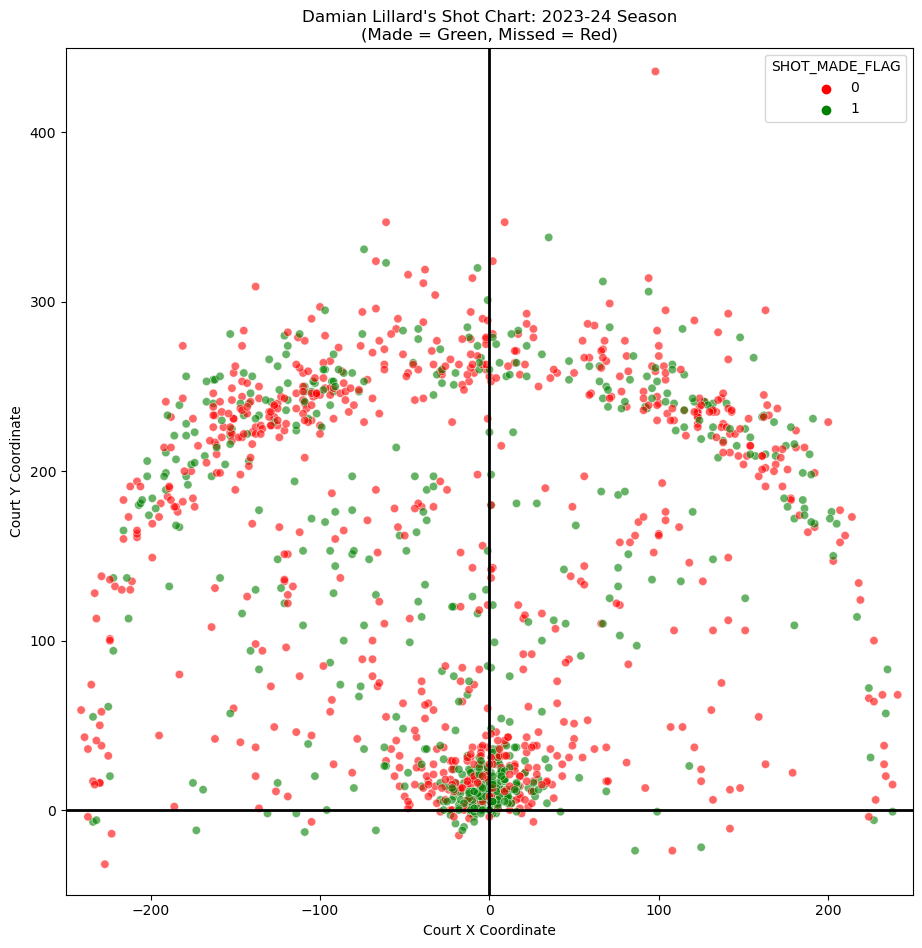

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shot_chart(data, player_name):
    plt.figure(figsize = (12, 11))
    sns.scatterplot(
        data = data, 
        x = 'LOC_X', 
        y = 'LOC_Y',
        hue = 'SHOT_MADE_FLAG',
        palette = {1: 'green', 0: 'red'},
        alpha = 0.6
    )
    plt.title(f"{player_name}'s Shot Chart: 2023-24 Season\n(Made = Green, Missed = Red)")
    plt.xlabel('Court X Coordinate')
    plt.ylabel('Court Y Coordinate')
    plt.axhline(0, color = 'black', linewidth=2) 
    plt.axvline(0, color = 'black', linewidth=2)
    plt.xlim(-250,250)
    plt.ylim(-50,450)
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.show()
    
plot_shot_chart(curry_shot_data, 'Stephen Curry')
plot_shot_chart(lillard_shot_data, 'Damian Lillard')

In [19]:
import pandas as pd

def calculate_zone_efficiency(data, player_name):
    # Define shot zones
    zones = {
        'Near the Rim': data[data['SHOT_DISTANCE'] <= 8],
        'Mid-Range': data[(data['SHOT_DISTANCE'] > 8) & (data['SHOT_DISTANCE'] <= 23)],
        'Three-Point Range': data[data['SHOT_DISTANCE'] > 23]
    }

    # Calculate shooting percentage for each zone
    zone_efficiency = {}
    for zone_name, zone_data in zones.items():
        made_shots = zone_data['SHOT_MADE_FLAG'].sum()
        total_shots = len(zone_data)
        shooting_percentage = made_shots / total_shots if total_shots > 0 else 0
        zone_efficiency[zone_name] = round(shooting_percentage * 100, 2)

    # Convert to DataFrame
    zone_efficiency_df = pd.DataFrame.from_dict(zone_efficiency, orient='index', columns=['Shooting Percentage'])
    print(f"\n{player_name}'s Shooting Percentage by Zone:\n", zone_efficiency_df)
    return zone_efficiency_df

# Calculate and display shooting efficiency for Curry and Lillard
curry_zone_efficiency = calculate_zone_efficiency(curry_shot_data, 'Stephen Curry')
lillard_zone_efficiency = calculate_zone_efficiency(lillard_shot_data, 'Damian Lillard')



Stephen Curry's Shooting Percentage by Zone:
                    Shooting Percentage
Near the Rim                     57.23
Mid-Range                        46.23
Three-Point Range                39.43

Damian Lillard's Shooting Percentage by Zone:
                    Shooting Percentage
Near the Rim                     52.69
Mid-Range                        40.47
Three-Point Range                35.75


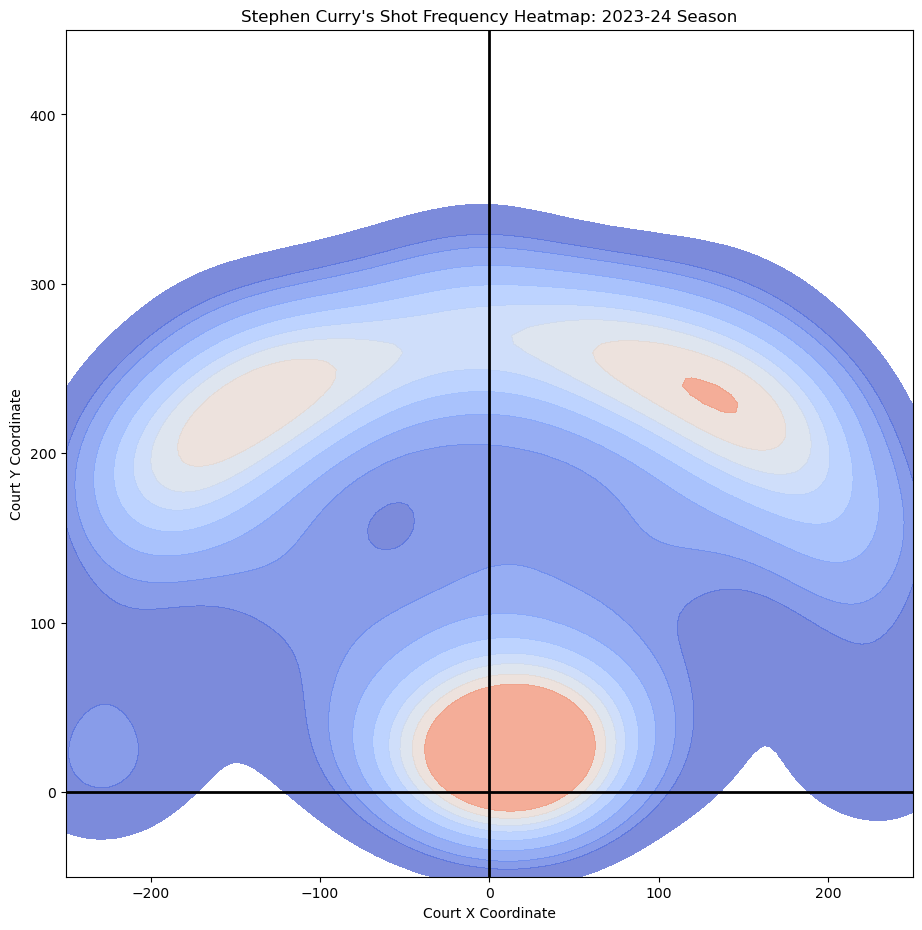

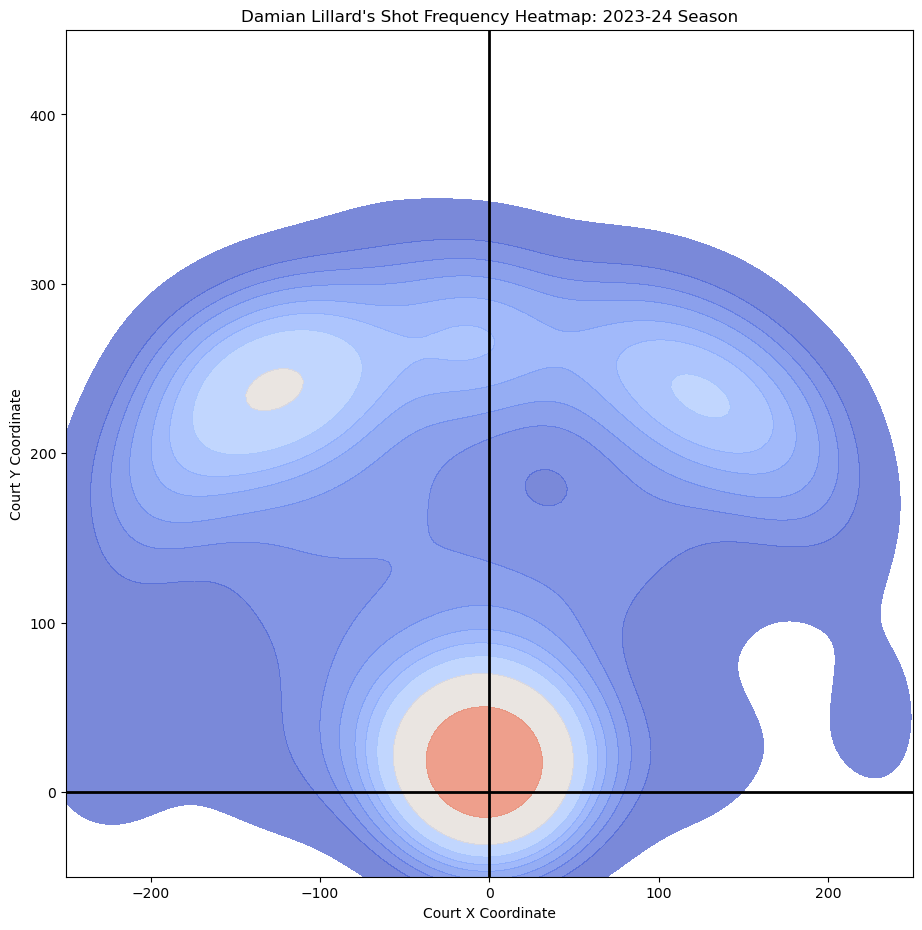

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot shot frequency heatmap
def plot_shot_heatmap(data, player_name):
    plt.figure(figsize=(12, 11))
    sns.kdeplot(
        data=data, 
        x='LOC_X', 
        y='LOC_Y', 
        fill=True, 
        cmap='coolwarm', 
        alpha=0.7
    )
    plt.title(f"{player_name}'s Shot Frequency Heatmap: 2023-24 Season")
    plt.xlabel('Court X Coordinate')
    plt.ylabel('Court Y Coordinate')
    plt.axhline(0, color='black', linewidth=2)
    plt.axvline(0, color='black', linewidth=2)
    plt.xlim(-250, 250)
    plt.ylim(-50, 450)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Plot heatmaps for Curry and Lillard
plot_shot_heatmap(curry_shot_data, 'Stephen Curry')
plot_shot_heatmap(lillard_shot_data, 'Damian Lillard')


In [21]:
# Filter for shots taken in the 4th quarter
curry_clutch_shots = curry_shot_data[curry_shot_data['PERIOD'] == 4]
lillard_clutch_shots = lillard_shot_data[lillard_shot_data['PERIOD'] == 4]

# Calculate shooting percentage in the 4th quarter
def calculate_clutch_efficiency(data, player_name):
    made_shots = data['SHOT_MADE_FLAG'].sum()
    total_shots = len(data)
    clutch_percentage = made_shots / total_shots if total_shots > 0 else 0
    print(f"{player_name}'s 4th Quarter Shooting Percentage: {round(clutch_percentage * 100, 2)}%")

calculate_clutch_efficiency(curry_clutch_shots, 'Stephen Curry')
calculate_clutch_efficiency(lillard_clutch_shots, 'Damian Lillard')


Stephen Curry's 4th Quarter Shooting Percentage: 45.6%
Damian Lillard's 4th Quarter Shooting Percentage: 43.75%


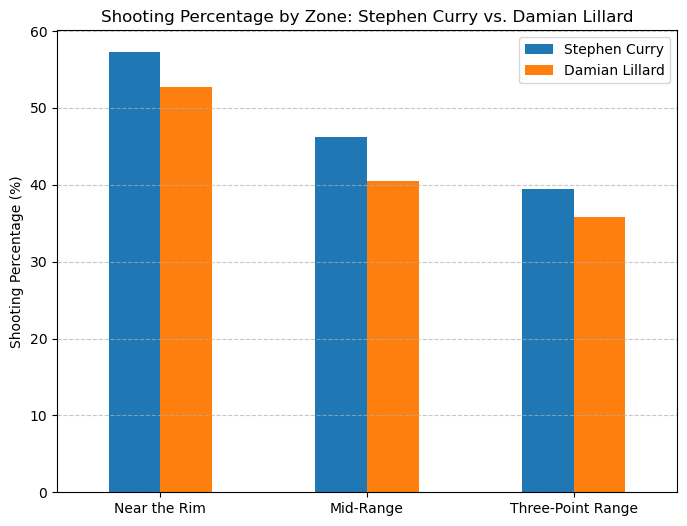

In [22]:
import matplotlib.pyplot as plt

# Combine zone efficiency data into a single DataFrame for easy plotting
zone_comparison = pd.DataFrame({
    'Stephen Curry': curry_zone_efficiency['Shooting Percentage'],
    'Damian Lillard': lillard_zone_efficiency['Shooting Percentage']
})

# Plot a bar chart for visual comparison
zone_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Shooting Percentage by Zone: Stephen Curry vs. Damian Lillard')
plt.ylabel('Shooting Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


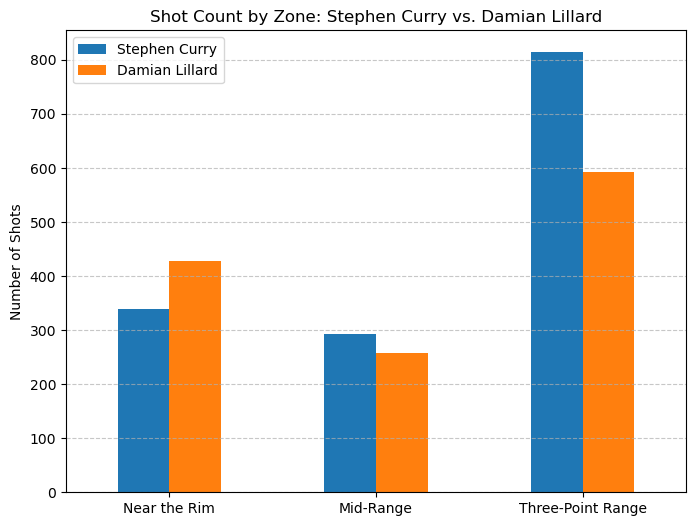

In [23]:
# Define function to calculate the number of shots in each zone
def calculate_shot_distribution(data):
    shot_distribution = {
        'Near the Rim': len(data[data['SHOT_DISTANCE'] <= 8]),
        'Mid-Range': len(data[(data['SHOT_DISTANCE'] > 8) & (data['SHOT_DISTANCE'] <= 23)]),
        'Three-Point Range': len(data[data['SHOT_DISTANCE'] > 23])
    }
    return pd.Series(shot_distribution)

# Calculate the shot distributions for Curry and Lillard
curry_shot_distribution = calculate_shot_distribution(curry_shot_data)
lillard_shot_distribution = calculate_shot_distribution(lillard_shot_data)

# Combine the distributions into a single DataFrame for comparison
shot_distribution_comparison = pd.DataFrame({
    'Stephen Curry': curry_shot_distribution,
    'Damian Lillard': lillard_shot_distribution
})

# Plot the shot distribution comparison
shot_distribution_comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Shot Count by Zone: Stephen Curry vs. Damian Lillard')
plt.ylabel('Number of Shots')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
